Cross-validation Accuracy Scores: [0.81818182 0.81118881 0.78873239 0.73943662 0.79577465]
Mean CV Accuracy: 0.7906628582684921
Training Accuracy: 0.800561797752809
Training Precision: 0.7581967213114754
Training Recall: 0.6902985074626866
Training F1 Score: 0.72265625
Test Accuracy: 0.8100558659217877
Test Precision: 0.7857142857142857
Test Recall: 0.7432432432432432
Test F1 Score: 0.7638888888888888


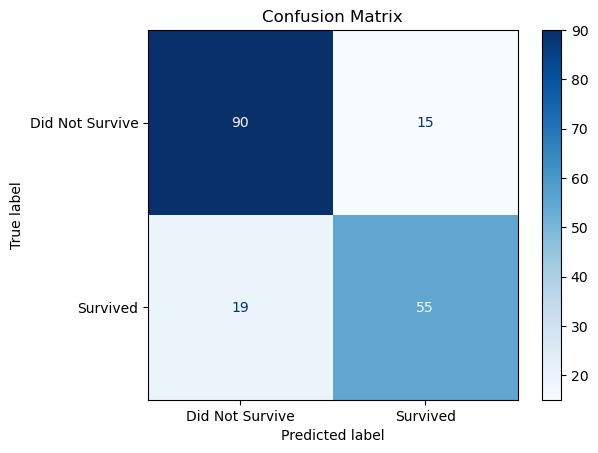

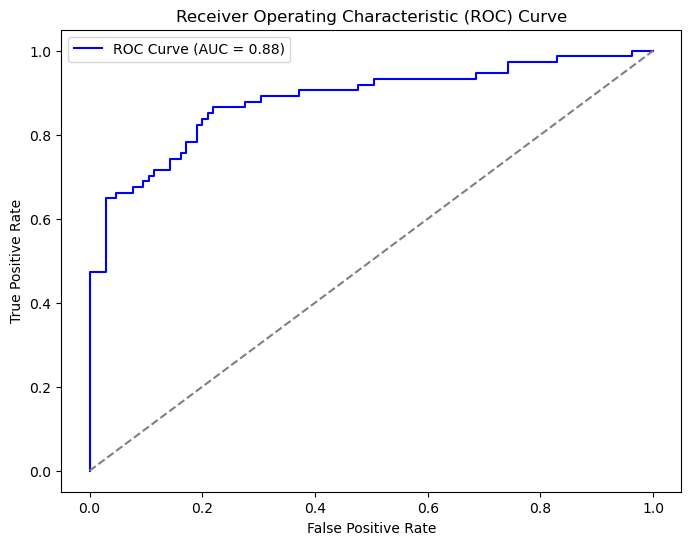

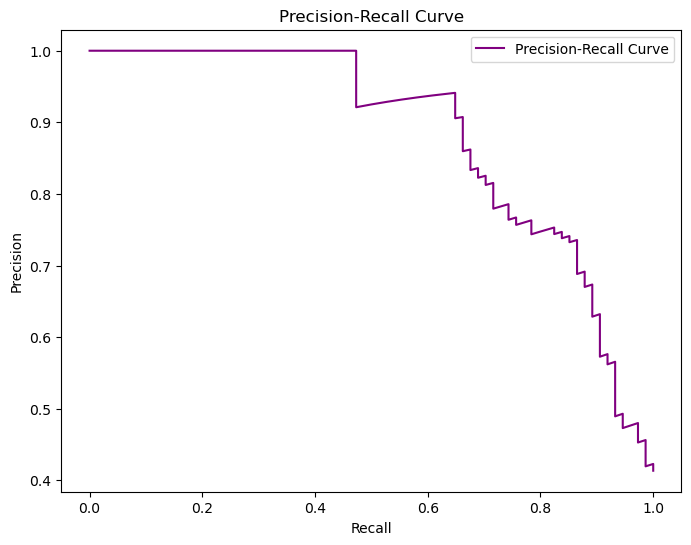

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    roc_curve, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
data = sns.load_dataset('titanic')

# Step 1: Data Preprocessing
# Drop unnecessary columns and rows with missing values in the target variable ('survived')
data = data.drop(columns=['deck', 'embark_town', 'alive'])  # Dropping columns not needed or with high NaNs
data = data.dropna(subset=['survived'])  # Dropping rows where target variable is missing

# Fill missing values in 'age' and 'embarked'
data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

# Encoding categorical variables
data['sex'] = data['sex'].map({'male': 0, 'female': 1})  # Encoding 'sex' as 0 and 1
data = pd.get_dummies(data, columns=['embarked'], drop_first=True)

# Select relevant features and target variable
X = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S']]
y = data['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Logistic Regression Model
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit the model
log_reg.fit(X_train, y_train)

# Step 3: Model Evaluation
# Predict on training and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print evaluation results
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

# Step 4: Plot the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=["Did Not Survive", "Survived"]).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Step 5: Plot the ROC Curve and Calculate AUC
y_test_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
auc_score = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Step 6: Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


<brb>

##### The logistic regression model shows strong performance in predicting Titanic passenger survival, as indicated by consistent cross-validation accuracy, averaging around 79%. This stability across folds suggests good generalisation. The model achieves an 80% training accuracy and a slightly higher (81%) test accuracy, indicating it has likely avoided overfitting.
##### Analysing precision, recall and provides insights into the models handling of false positives and false negatives. On the training set, precision (76%) and recall (69%) suggest a slight bias toward identifying non-survivors correctly. Test set precision (79%) and recall (74%) are slightly higher implying improved accuracy in detecting survivors on unseen data. The F1 score of 76% demonstrates a balanced performance in identifying true positives. The confusion matrix further details these patterns, showing that the model correctly identifies 90 non survivors and 55 survivors, while misclassifying 15 non-survivors and missing 19 survivors, with a moderate false-negative rate among survivors.
##### The ROC curve with an AUC of 0.88, highlights the models discriminatory power in distinguishing survivors from non-survivors. The precision-recall curve supports this, showing that the model maintains high precision at various recall levels, only declining when attempting to capture nearly all positives.


<brb>